# Basic Usage

In [53]:
#2021/04/05 Tutorial on basic functions
# 
# these lines update the imported module if code is changed, you can remove them if not needed.

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
%reset
import os
import numpy as np

In [57]:
# this cell is hidden, it will not be shown
fn = r'G:\My Drive\progetti\ion_beam\specchio_beatrix\exemplar_data\MFT-txt\EN4-2-100.txt'
fn2 = r'G:\My Drive\progetti\c_overcoating\esperimenti\20200214_batch2_IrC\20200306_MFT_calibration\01_18803_A.csv'

infolder = r'G:\Shared drives\ion beam\dati\lavorazioni\2021_VERTX_RUN01_zerodur'

fdiff = 'VERT-X - VX01 - Zerodur - After-Before IBF.dat'
fdiff = os.path.join(infolder,fdiff)



"""
infolder=r'C:\Users\kovor\Documents\python\pyXTel\source\pySurf\test\input_data\4D\180215_C1S06_cut'
#r'..\..\source\pySurf\test\input_data\4D\180215_C1S06_cut'
fn = '180215_C1S01_RefSub.csv'
file = os.path.join(infolder,fn)
"""

## Overview

`PySurf` library consists in a set of classes and functions (in `pySurf.data2D_class`) representing 2D data and operations on them. An aggregated data `Dlist` (for advanced users) is also available to manage multiple images at once.

The main class represents 2D data linked to `x` and `y` coordinates. 
In the most basic use, `Data2D` can be initialized by providing a matrix of 2-dimensional data and (optionally) `x` and `y` coordinates. Other options can be passed as well.

note: The object interface is built on top of a function library in module `pySurf.data2D`: for almnost each method there is a corresponding function that can be called with something like `pySurf.data2D.function(data, x, y, ..)`. The use of the class interface is strongly suggested, as it implements a good number of additional capabilities (e.g. units of measurements or algebraic operations).

Similarly, routines operating on profiles (y as a function of x as couples of vector x and y), are contained in class `pyProfile.Profile` and `pyProfile.profile` which have in many points interfaces similar to modules in `pySurf`. 

Since the interface is quite similar, we will start demonstrating the library function using the `Data2D` class, first thing is importing it:


In [49]:
from pySurf.data2D_class import Data2D

The most basic way to initialize such an object is by passing directly 2D data, (optionally) coordinates and options.
We will then call the `.plot()` method:

<Axes: xlabel='X (mm)', ylabel='Y (mm)'>

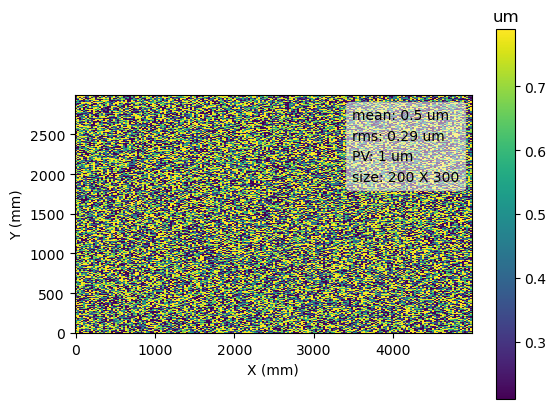

In [12]:
nx = 200
ny = 300
data = np.random.random(nx*ny).reshape(ny,nx)
x = np.arange(nx)*25
y = np.arange(ny)*10

D = Data2D(data,x,y,units=['mm','mm','um'])
D.plot()

If you need to interface `pyXsurf` with external code and you want to extract data and coordinates (as `np.arrays`), you can do this in any moment simply calling the object:

In [16]:
dd, xx, yy = D()

In [54]:
print(dd.shape,xx.shape,yy.shape)
print("Equal?", np.all(dd == data), np.all(x == xx), np.all(y ==yy))

(300, 200) (200,) (300,)
Equal? True True True


## Importing Data

Functions for reading common formats of 2D data are collected in `pySurf.readers` module. The structure and interface of readers is described elsewhere, a reader is essentially a function able to obtain `data, x, y` from a data file, however if the interface is correctly implemented, a reader from `pySurf.readers.instrumentReader` can be passed as argument to at object creation. In this case, additional information (e.g. from header or metadata) are automatically added to the object.

For example, here we read an AFM file in `.nid` format:

first argument is string, use it as filename


<Axes: title={'center': '180215_C1S01_RefSub.csv'}, xlabel='X', ylabel='Y'>

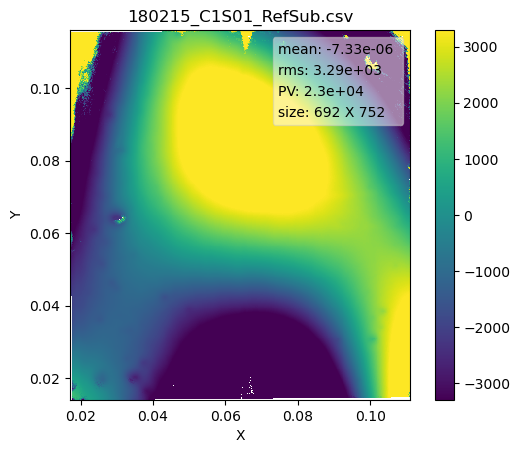

In [37]:
from pySurf.data2D_class import Data2D
from pySurf.instrumentReader import nid_reader

D = Data2D(file, strip=True, reader = nid_reader)
D.plot()

## Data manipulation functions

Basic operations like cropping or leveling can be applied by means of corresponding methods. Information about methods and options can be obtained by means of usual Python introspection methods.

Here some example:


<Axes: title={'center': '180215_C1S01_RefSub.csv'}, xlabel='X', ylabel='Y'>

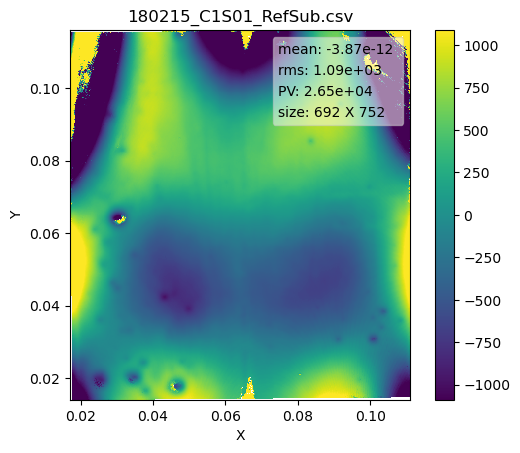

In [38]:
D2 = D.level((4,2))
D2.plot()  #Level 4 legendre along `x` and 2 along `y`.

`plotting` module contains commodity functions for plotting of data and comparisons, we use `plotting.multiplots.compare_images` to compare the original data with the modified version.